In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
from NEAT.genome import Genome

g1 = Genome(2, 3)

In [3]:
for i in range(20):
    g1.mutate()

In [4]:
for i in g1.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [5]:
list_edges = []
for nodes, conn in g1.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges.append(nodes)

(1, 3) 0.011073920591462415 True 1
(1, 4) 0.024000000000000004 True 2
(1, 5) -0.299904 True 3
(2, 3) 0.00046786577080320054 False 4
(2, 4) -0.5870592000000003 True 5
(2, 5) -0.002643498217584002 True 6
(2, 6) -0.02681280000000001 True 7
(6, 3) -0.03406233600000003 False 8
(6, 7) -0.06864076800000006 True 9
(7, 3) 1.762560000000001 True 10


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


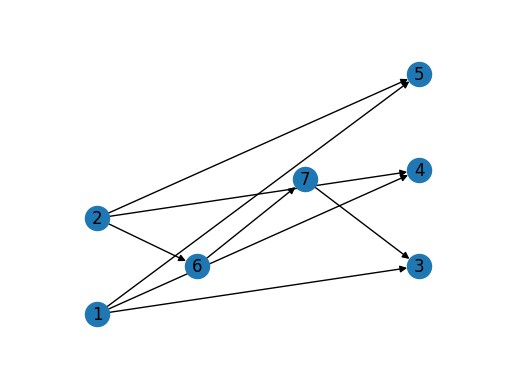

In [6]:
left_nodes = []
middle_nodes = []
right_nodes = []

for i in g1.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes.append(i.id)
    else:   # OUTPUT
        right_nodes.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

G = nx.DiGraph()
G.add_edges_from(list_edges)
nx.draw_networkx(G, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [7]:
from NEAT.neural_network import NeuralNetwork

nn = NeuralNetwork(g1, {1: 0.5, 2: 1.2})


1 : 
input = []
output = [<NEAT.neural_network.Neuron object at 0x0000019AFF42FFD0>, <NEAT.neural_network.Neuron object at 0x0000019AFF42C710>, <NEAT.neural_network.Neuron object at 0x0000019AE546DC10>]
weigths = {<NEAT.neural_network.Neuron object at 0x0000019AFF42FFD0>: 0.011073920591462415, <NEAT.neural_network.Neuron object at 0x0000019AFF42C710>: 0.024000000000000004, <NEAT.neural_network.Neuron object at 0x0000019AE546DC10>: -0.299904}
type = INPUT
ready = True
            
2 : 
input = []
output = [<NEAT.neural_network.Neuron object at 0x0000019AFF42C710>, <NEAT.neural_network.Neuron object at 0x0000019AE546DC10>, <NEAT.neural_network.Neuron object at 0x0000019AFF425510>]
weigths = {<NEAT.neural_network.Neuron object at 0x0000019AFF42C710>: -0.5870592000000003, <NEAT.neural_network.Neuron object at 0x0000019AE546DC10>: -0.002643498217584002, <NEAT.neural_network.Neuron object at 0x0000019AFF425510>: -0.02681280000000001}
type = INPUT
ready = True
            
3 : 
input = [<NEAT

In [8]:
print(nn.forward())

KeyboardInterrupt: 

In [7]:
g2 = Genome(2, 3)
for i in range(20):
    g2.mutate()

In [8]:
for i in g2.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [9]:
list_edges2 = []
list_conn2 = []
for nodes, conn in g2.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    list_conn2.append(conn)
    if conn.Enabled:
        list_edges2.append(nodes)

(1, 3) -0.056456400000000025 True 1
(1, 4) -6.362033932800008e-06 True 2
(1, 5) 0.15455784960000013 True 3
(2, 3) -0.53 False 4
(2, 4) -0.0009193857750000005 False 5
(2, 5) -0.04745727751564806 True 6
(2, 6) 0.1340897918976001 True 11
(6, 3) 1.0368000000000004 True 12
(6, 5) -0.051163200000000034 False 8
(2, 7) -0.0009193857750000005 True 13
(7, 4) 1 True 10


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


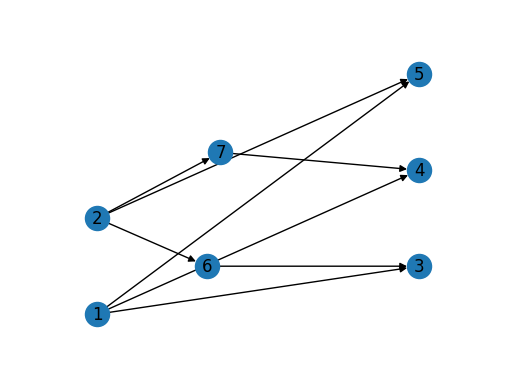

In [10]:
left_nodes2 = []
middle_nodes2 = []
right_nodes2 = []

for i in g2.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes2.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes2.append(i.id)
    else:   # OUTPUT
        right_nodes2.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes2)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes2)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes2)})

G2 = nx.DiGraph()
G2.add_edges_from(list_edges2)
nx.draw_networkx(G2, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [11]:
from NEAT.species import Species

g1.fitness = 1
g2.fitness = 0.5

gens = [g1, g2]

In [12]:
s = Species(.5, gens, 1, 1, 1)
offspring: Genome = s.cross_over(g1, g2)

In [13]:
for i in offspring.nodes.genes:
    print(i.id, i.type)

1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


In [14]:
list_edges3 = []
for nodes, conn in offspring.connections.genes.items():
    print(nodes, conn.Weight, conn.Enabled, conn.Innovation)
    if conn.Enabled:
        list_edges3.append(nodes)

(2, 7) -0.0009193857750000005 True 13
(6, 3) 1.0368000000000004 True 12
(2, 6) 0.1340897918976001 True 11
(7, 4) 0.4856 True 10
(1, 7) -0.34 True 9
(6, 5) 0.05220561600000003 True 8
(1, 6) 0.027159390720000027 True 7
(2, 5) 0.06333745952911113 True 6
(2, 4) -2.3260596928875006 True 5
(2, 3) -0.28282219206476805 True 4
(1, 5) 0.07745528448000007 False 3
(1, 4) -0.26617818101696644 False 2
(1, 3) -0.04791512400602932 True 1


1 INPUT
2 INPUT
3 OUTPUT
4 OUTPUT
5 OUTPUT
6 HIDDEN
7 HIDDEN


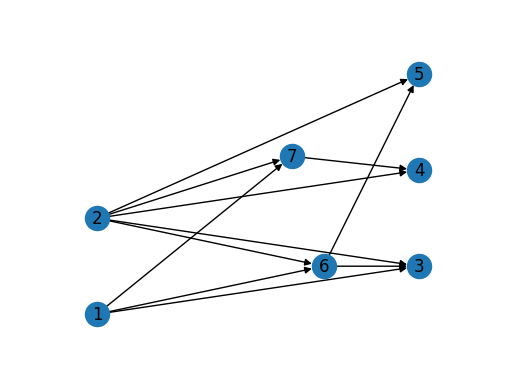

In [15]:
left_nodes3 = []
middle_nodes3 = []
right_nodes3 = []

for i in offspring.nodes.genes:
    print(i.id, i.type)
    if i.type == "INPUT":
        left_nodes3.append(i.id)
    elif i.type == "HIDDEN":
        middle_nodes3.append(i.id)
    else:   # OUTPUT
        right_nodes3.append(i.id)

pos = {n: (0, i) for i, n in enumerate(left_nodes3)}
pos.update({n: (random.uniform(0.5, 1.5), i*random.uniform(0.5, 1.5) + 0.5) for i, n in enumerate(middle_nodes3)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes3)})

G3 = nx.DiGraph()
G3.add_edges_from(list_edges3)
nx.draw_networkx(G3, pos)

ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()